In [ ]:
!pip install tensorflow==2.16.1

In [1]:
import tensorflow as tf

In [ ]:
!pip install opencv-python matplotlib

In [2]:
#Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import streamlit as st
from PIL import Image

In [3]:
#Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [4]:
#Create Folder Structures
os.chdir(r"C:\Users\KIIT\OneDrive\Desktop\MajorProject")


In [5]:
#setup paths 
POS_PATH= os.path.join('data', 'positive')
NEG_PATH= os.path.join('data', 'negative')
ANC_PATH= os.path.join('data', 'anchor')

In [6]:
#make directories
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

In [7]:
# http://vis-www.cs.umass.edu/lfw/

In [8]:
#Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf ""C:\\Users\\KIIT\\OneDrive\\Desktop\\MajorProject\\lfw""

tar: Error opening archive: Error reading 'C:\\Users\\KIIT\\OneDrive\\Desktop\\MajorProject\\lfw'


In [9]:
#Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [10]:
#Import uuid library to generate unique image names
import uuid

In [11]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\bd140b83-b55e-11f0-9d95-c0fbc5269fac.jpg'

In [12]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
    
    #Cut down frame to 250X250px
    frame = frame[120:120+250,200:200+250, :]

    #Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #Create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #Write out anchor image
        cv2.imwrite(imgname, frame)

    #Collect Positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        #Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #Write out anchor image
        cv2.imwrite(imgname, frame)
    
    

    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
#Close the image show frame
cv2.destroyAllWindows()

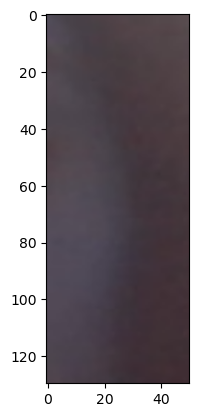

In [27]:
plt.imshow(frame[120:120+250,200:200+250, :])

In [29]:
#Get Image Directories

In [31]:
import os, glob

print("Current working directory:", os.getcwd())
print("Anchor folder exists:", os.path.exists("data/anchor"))

print("Files inside data/anchor:", glob.glob("data/anchor/*"))


Current working directory: C:\Users\KIIT\OneDrive\Desktop\MajorProject
Anchor folder exists: True
Files inside data/anchor: ['data/anchor\\06d62143-a126-11ef-acb4-c05c3a872cb5.jpg', 'data/anchor\\0784255e-a126-11ef-b958-c05c3a872cb5.jpg', 'data/anchor\\2b194731-a03b-11ef-9b79-c05c3a872cb5.jpg', 'data/anchor\\2e79b27c-a03b-11ef-a994-c05c3a872cb5.jpg', 'data/anchor\\2ec9daf0-a03b-11ef-8ced-c05c3a872cb5.jpg', 'data/anchor\\3862600d-588d-11ef-8a77-c89402f4fe9c.jpg', 'data/anchor\\38b24f1c-587e-11ef-a0e4-c89402f4fe9c.jpg', 'data/anchor\\38cd7c28-588d-11ef-a4fc-c89402f4fe9c.jpg', 'data/anchor\\38eec0f1-588d-11ef-8a33-c89402f4fe9c.jpg', 'data/anchor\\39105016-588d-11ef-9adb-c89402f4fe9c.jpg', 'data/anchor\\394e4c3d-588d-11ef-af07-c89402f4fe9c.jpg', 'data/anchor\\39d54b14-588d-11ef-baf2-c89402f4fe9c.jpg', 'data/anchor\\3a158aec-588d-11ef-997d-c89402f4fe9c.jpg', 'data/anchor\\3a586e54-588d-11ef-a967-c89402f4fe9c.jpg', 'data/anchor\\3a7c1153-588d-11ef-9955-c89402f4fe9c.jpg', 'data/anchor\\3a9db0

In [33]:
anchor = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(300)

In [35]:
ANC_PATH+'/*.jpg'

'data\\anchor/*.jpg'

In [37]:
dir_test = anchor.as_numpy_iterator()

In [39]:
print(dir_test.next())

b'data\\anchor\\924d9657-588d-11ef-850a-c89402f4fe9c.jpg'


In [41]:
#Preprocessing- Scale and Resize

In [43]:
def preprocess(file_path):

    #Read in image from file path
    byte_img = tf.io.read_file(file_path)
    #Load in the image
    img = tf.io.decode_jpeg(byte_img)

    #Preprocessing steps = resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    #Scale image to be between 0 and 1
    img = img / 255.0

    #Return Image
    return img

In [45]:
img = preprocess('data\\anchor\\9d44ce68-588d-11ef-a46c-c89402f4fe9c.jpg')

In [47]:
img.numpy().max()

0.9629902

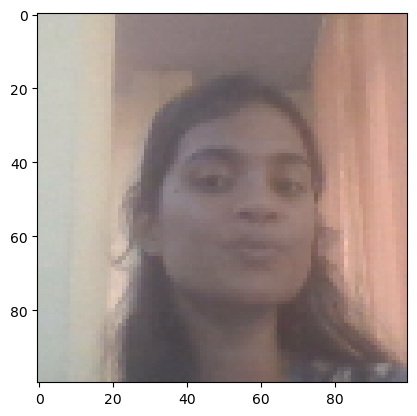

In [49]:
plt.imshow(img)

In [51]:
#Create Labelled Dataset

In [53]:
#(anchor, positive) => 1,1,1,1,1
#(anchor, negative) => 0,0,0,0,0

In [55]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [57]:
samples = data.as_numpy_iterator()

In [59]:
example = samples.next()

In [61]:
example

(b'data\\anchor\\d16e03b6-5627-11ef-b474-c89402f4fe9c.jpg',
 b'data\\positive\\251ddf0e-588c-11ef-8752-c89402f4fe9c.jpg',
 1.0)

In [63]:
#Build Train and Test Partition

In [65]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [67]:
res = preprocess_twin(*example)

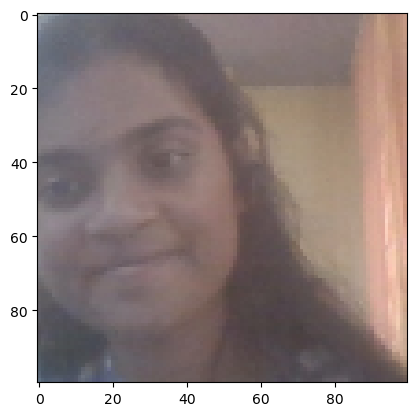

In [69]:
plt.imshow(res[1])

In [71]:
res[2]

1.0

In [73]:
#Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [75]:
samples = data.as_numpy_iterator()

In [77]:
len(samples.next())

3

In [78]:
samp = samples.next()

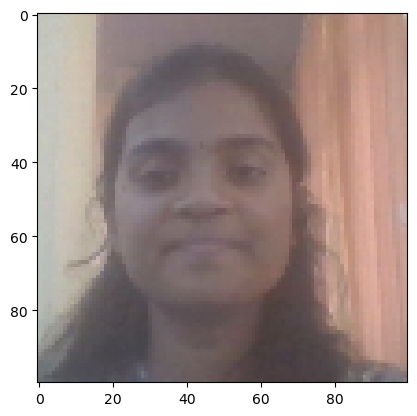

In [81]:
plt.imshow(samp[0])

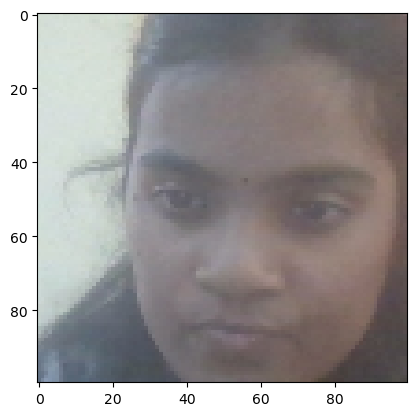

In [83]:
plt.imshow(samp[1])

In [85]:
samp[2]

1.0

In [87]:
#Training Section

In [89]:
#Training Partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [91]:
#Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering

In [94]:
#Build Embedding Layer

In [96]:
inp = Input(shape=(100,100,3))

In [98]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [100]:
c1

<KerasTensor shape=(None, 91, 91, 64), dtype=float32, sparse=False, name=keras_tensor_1>

In [102]:
def make_embedding():
    inp = Input(shape=(100,100,3), name= 'keras_tensor')

    #First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    #Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

     #Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

     #Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    

    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [104]:
embedding = make_embedding()

In [106]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor (InputLayer)            │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
#Build Distance Layer

In [110]:
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding[0] - validation_embedding[0])

In [112]:
l1 = L1Dist()

In [114]:
#Make Siamese Model

In [116]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [118]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [120]:
siamese_layer = L1Dist()

In [122]:
distances = siamese_layer(inp_embedding, val_embedding)

In [124]:
distances

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_13>

In [126]:
classifier = Dense(1, activation='sigmoid')(distances)

In [128]:
classifier

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_14>

In [130]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [132]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_1 (L1Dist)            │ (None, 4096)              │               0 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')


In [136]:
siamese_model = make_siamese_model()

In [138]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_2 (L1Dist)            │ (None, 4096)              │               0 │ embedding[2][0],           │
│                               │                           │                 │ embedding[3][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_2[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [140]:
embedding(validation_image)

[<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_19>]

In [142]:
import tensorflow as tf
from keras.models import load_model

# ---- Define your custom L1Dist layer (fixed version) ----
class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        # Expect inputs as a list or tuple of two tensors
        input_embedding, validation_embedding = inputs
        return tf.math.abs(input_embedding - validation_embedding)

    def get_config(self):
        base_config = super().get_config()
        return base_config


# ---- Assume your siamese model is already created ----
# siamese_model = make_siamese_model()

# ---- SAVE MODEL (.keras format) ----
save_path = "models/siamese_model.keras"
siamese_model.save(save_path)
print(f"✅ Model saved successfully at {save_path}")

# ---- LOAD MODEL (.keras format) ----
loaded_model = load_model(save_path, custom_objects={'L1Dist': L1Dist})
print("✅ Model loaded successfully and ready to use!")



✅ Model saved successfully at models/siamese_model.keras


TypeError: <class 'keras.src.models.functional.Functional'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {'name': 'SiameseNetwork', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 100, 100, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_img'}, 'registered_name': None, 'name': 'input_img', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 100, 100, 3], 'dtype': 'float32', 'sparse': False, 'name': 'validation_img'}, 'registered_name': None, 'name': 'validation_img', 'inbound_nodes': []}, {'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {'name': 'embedding', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 100, 100, 3], 'dtype': 'float32', 'sparse': False, 'name': 'keras_tensor'}, 'registered_name': None, 'name': 'keras_tensor', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 64, 'kernel_size': [10, 10], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 100, 100, 3]}, 'name': 'conv2d_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 100, 100, 3], 'dtype': 'float32', 'keras_history': ['keras_tensor', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'pool_size': [64, 64], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 91, 91, 64]}, 'name': 'max_pooling2d', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 91, 91, 64], 'dtype': 'float32', 'keras_history': ['conv2d_1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'filters': 128, 'kernel_size': [7, 7], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 46, 46, 64]}, 'name': 'conv2d_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 46, 46, 64], 'dtype': 'float32', 'keras_history': ['max_pooling2d', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'pool_size': [64, 64], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 40, 40, 128]}, 'name': 'max_pooling2d_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 40, 40, 128], 'dtype': 'float32', 'keras_history': ['conv2d_2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'filters': 128, 'kernel_size': [4, 4], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 20, 20, 128]}, 'name': 'conv2d_3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 20, 20, 128], 'dtype': 'float32', 'keras_history': ['max_pooling2d_1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'pool_size': [64, 64], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 17, 128]}, 'name': 'max_pooling2d_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 17, 17, 128], 'dtype': 'float32', 'keras_history': ['conv2d_3', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'filters': 256, 'kernel_size': [4, 4], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 9, 9, 128]}, 'name': 'conv2d_4', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 9, 9, 128], 'dtype': 'float32', 'keras_history': ['max_pooling2d_2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 6, 6, 256]}, 'name': 'flatten', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 6, 6, 256], 'dtype': 'float32', 'keras_history': ['conv2d_4', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'units': 4096, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 9216]}, 'name': 'dense', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 9216], 'dtype': 'float32', 'keras_history': ['flatten', 0, 0]}}], 'kwargs': {}}]}], 'input_layers': [['keras_tensor', 0, 0]], 'output_layers': [['dense', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'name': 'embedding', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 100, 100, 3], 'dtype': 'float32', 'keras_history': ['input_img', 0, 0]}}], 'kwargs': {'mask': None}}, {'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 100, 100, 3], 'dtype': 'float32', 'keras_history': ['validation_img', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': None, 'class_name': 'L1Dist', 'config': {'name': 'l1_dist_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}}, 'registered_name': 'L1Dist', 'build_config': {'input_shape': [[None, 4096]]}, 'name': 'l1_dist_2', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, 4096], 'dtype': 'float32', 'keras_history': ['embedding', 0, 0]}}], [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 4096], 'dtype': 'float32', 'keras_history': ['embedding', 1, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4096]}, 'name': 'dense_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 4096], 'dtype': 'float32', 'keras_history': ['l1_dist_2', 0, 0]}}], 'kwargs': {}}]}], 'input_layers': [['input_img', 0, 0], ['validation_img', 0, 0]], 'output_layers': [['dense_2', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}}.

Exception encountered: too many positional arguments

# Training

## Setup Loss and Optimizer

In [146]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [148]:
opt = tf.keras.optimizers.Adam(1e-4) #0.0001

## Establish Checkpoints

In [151]:
checkpoint_dir = "./training_checkpoints" # Current image transfered to training
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt') # name of the images with unique numbers behind
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## Build Train Step Function

In [154]:
test_batch = train_data.as_numpy_iterator()

In [156]:
batch_1 = test_batch.next()

In [158]:
len(batch_1[0])

16

In [160]:
X = batch_1[:2]

In [162]:
y = batch_1[2]

In [164]:
y

array([1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.],
      dtype=float32)

In [166]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
    dtype=None,
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](htt

In [168]:
@tf.function
def train_step(batch):
    

    with tf.GradientTape() as tape:
        #Get anchor and positive/negative image
        X = batch[:2]
        #Get Label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(X, training=True)
        #Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    #Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    #Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    return loss
    
    

## Build Training Loop

In [171]:
def train(data, EPOCHS):
    #Loop through Epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))   #current epoch/all the Epoch
        progbar = tf.keras.utils.Progbar(len(data))

        #Loop through each Batch
        for idx, batch in enumerate(data):
            #Run train step here
            train_step(batch)
            progbar.update(idx+1)

        #Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix) #start saving with'ckpt' at every 10 epochs
        

In [173]:
# Train the model

In [175]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)

In [177]:
#Importing metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [179]:
#Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [181]:
#make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


array([[0.49364653],
       [0.49943212],
       [0.5007145 ],
       [0.4960567 ],
       [0.49980593],
       [0.49733084],
       [0.49968308],
       [0.5002059 ],
       [0.4988979 ],
       [0.49988443],
       [0.5003605 ],
       [0.49550027],
       [0.50061226],
       [0.49765527],
       [0.5009084 ],
       [0.5003957 ]], dtype=float32)

In [182]:
# Post processing the results
#[1 if y_hat > 0.5 else 0 for prediction in y_hat]
predictions = [1 if prediction > 0.5 else 0 for prediction in y_hat]

In [185]:
predictions

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]

In [187]:
y_true

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

Calculate Metrics

In [190]:
#Creating  a metric object
m = Recall()

#Calculating the recall value
m.update_state(y_true, y_hat)

#Return Recall result
m.result().numpy()


0.6

In [192]:
#Creating 
m = Precision()

#Calculating the recall value
m.update_state(y_true, y_hat)

#Return Recall result
m.result().numpy()


1.0

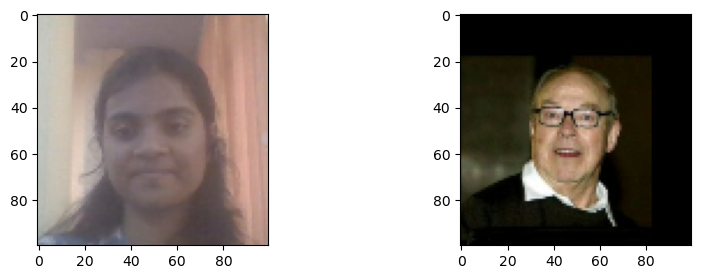

In [194]:
#set plot size
plt.figure(figsize=(10,3))

#set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])  # first input prediction output 0
plt.subplot(1,2,2)
plt.imshow(test_val[0])

#Render cleanly
plt.show()

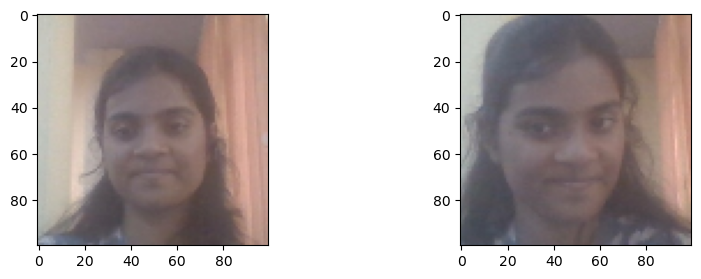

In [196]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(test_input[0])  # second input prediction output 1
plt.subplot(1,2,2)
plt.imshow(test_val[1])
plt.show()

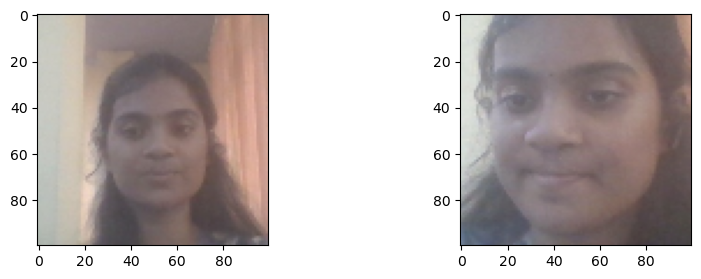

In [198]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(test_input[2])  # third input prediction output 0
plt.subplot(1,2,2)
plt.imshow(test_val[2])
plt.show()

In [200]:
#save weights
#siamese_model.save('siamesemodel.h5')
siamese_model.save('siamesemodel.keras')

In [214]:
import tensorflow as tf
from keras.models import load_model

class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L1Dist, self).__init__(**kwargs)

    def call(self, *args, **kwargs):
        """
        Handles both call(x, y) and call([x, y]) forms.
        """
        if len(args) == 1:
            # Model gave us a single list [x, y]
            inputs = args[0]
            input_embedding, validation_embedding = inputs
        else:
            # Model passed two separate tensors
            input_embedding, validation_embedding = args

        return tf.abs(input_embedding - validation_embedding)

    def get_config(self):
        return super().get_config()


# ✅ Save + Load (no save_format needed)
save_path = "models/siamese_model.keras"

# siamese_model = make_siamese_model()
# siamese_model.save(save_path)
print(f"✅ Model saved successfully at {save_path}")

loaded_model = load_model(
    save_path,
    custom_objects={"L1Dist": L1Dist,
                    "BinaryCrossentropy": tf.keras.losses.BinaryCrossentropy},
)
print("✅ Model loaded successfully and ready to use!")


✅ Model saved successfully at models/siamese_model.keras


TypeError: <class 'keras.src.models.functional.Functional'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {'name': 'SiameseNetwork', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 100, 100, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_img'}, 'registered_name': None, 'name': 'input_img', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 100, 100, 3], 'dtype': 'float32', 'sparse': False, 'name': 'validation_img'}, 'registered_name': None, 'name': 'validation_img', 'inbound_nodes': []}, {'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {'name': 'embedding', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 100, 100, 3], 'dtype': 'float32', 'sparse': False, 'name': 'keras_tensor'}, 'registered_name': None, 'name': 'keras_tensor', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 64, 'kernel_size': [10, 10], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 100, 100, 3]}, 'name': 'conv2d_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 100, 100, 3], 'dtype': 'float32', 'keras_history': ['keras_tensor', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'pool_size': [64, 64], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 91, 91, 64]}, 'name': 'max_pooling2d', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 91, 91, 64], 'dtype': 'float32', 'keras_history': ['conv2d_1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'filters': 128, 'kernel_size': [7, 7], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 46, 46, 64]}, 'name': 'conv2d_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 46, 46, 64], 'dtype': 'float32', 'keras_history': ['max_pooling2d', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'pool_size': [64, 64], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 40, 40, 128]}, 'name': 'max_pooling2d_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 40, 40, 128], 'dtype': 'float32', 'keras_history': ['conv2d_2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'filters': 128, 'kernel_size': [4, 4], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 20, 20, 128]}, 'name': 'conv2d_3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 20, 20, 128], 'dtype': 'float32', 'keras_history': ['max_pooling2d_1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'pool_size': [64, 64], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 17, 128]}, 'name': 'max_pooling2d_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 17, 17, 128], 'dtype': 'float32', 'keras_history': ['conv2d_3', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'filters': 256, 'kernel_size': [4, 4], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 9, 9, 128]}, 'name': 'conv2d_4', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 9, 9, 128], 'dtype': 'float32', 'keras_history': ['max_pooling2d_2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 6, 6, 256]}, 'name': 'flatten', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 6, 6, 256], 'dtype': 'float32', 'keras_history': ['conv2d_4', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'units': 4096, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 9216]}, 'name': 'dense', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 9216], 'dtype': 'float32', 'keras_history': ['flatten', 0, 0]}}], 'kwargs': {}}]}], 'input_layers': [['keras_tensor', 0, 0]], 'output_layers': [['dense', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'name': 'embedding', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 100, 100, 3], 'dtype': 'float32', 'keras_history': ['input_img', 0, 0]}}], 'kwargs': {'mask': None}}, {'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 100, 100, 3], 'dtype': 'float32', 'keras_history': ['validation_img', 0, 0]}}], 'kwargs': {'mask': None}}]}, {'module': None, 'class_name': 'L1Dist', 'config': {'name': 'l1_dist_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}}, 'registered_name': 'L1Dist', 'build_config': {'input_shape': [[None, 4096]]}, 'name': 'l1_dist_2', 'inbound_nodes': [{'args': [[{'class_name': '__keras_tensor__', 'config': {'shape': [None, 4096], 'dtype': 'float32', 'keras_history': ['embedding', 0, 0]}}], [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 4096], 'dtype': 'float32', 'keras_history': ['embedding', 1, 0]}}]], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2083296071408}, 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4096]}, 'name': 'dense_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 4096], 'dtype': 'float32', 'keras_history': ['l1_dist_2', 0, 0]}}], 'kwargs': {}}]}], 'input_layers': [['input_img', 0, 0], ['validation_img', 0, 0]], 'output_layers': [['dense_2', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}}.

Exception encountered: Exception encountered when calling L1Dist.call().

[1mCould not automatically infer the output shape / dtype of 'l1_dist_2' (of type L1Dist). Either the `L1Dist.call()` method is incorrect, or you need to implement the `L1Dist.compute_output_spec() / compute_output_shape()` method. Error encountered:

unsupported operand type(s) for -: 'list' and 'list'[0m

Arguments received by L1Dist.call():
  • args=(['<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_135>'], ['<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_137>'])
  • kwargs=<class 'inspect._empty'>

In [212]:
tf.keras.models.load_model?? 

SyntaxError: invalid syntax (1695949774.py, line 1)

In [ ]:
model.predict([test_input, test_val])

In [ ]:
model.summary()